## Zip Introduction
### Introduction

<img height= 200 width=300 class="imgright" src="../images/text_zip.webp" srcset="../images/text_zip_300w.webp 300w" alt="Infection rate" />

In this chapter of our Python tutorial we deal with the wonderful and extremely useful functionality 'zip'. Unfortunately, beginners of Python are quite often unnecessarily confused and frightened by zip. First of all the name is confusing. Lots of people confuse the zip of Python with the well-known archive file format ZIP, which is used for lossless data compression. Since this data compression not only keeps the required storage space very small, but is also carried out very quickly, the name 'zip' was chosen. In this context, "zip" means "to act quickly or move quickly".

The 'zip' of Python has absolutely nothing to do with it. The functionality 'zip' in Python is based on another meaning of the English word 'zip', "closing something with a zipper".

We will see that zip can be very easy to understand. However, this does not apply if you come up with the idea of using the Python help function. The help text is certainly partly responsible for this and frightens the novices away:

    Return a zip object whose .next() method returns a tuple where the i-th element comes from the i-th iterable argument. The .next() method continues until the shortest iterable in the argument sequence is exhausted and then it raises StopIteration.

This text is correct but it is hard to understand. Let us start with simple examples before we try to simplify the theory behind zip.

We will start with two lists and apply zip to those two lists:

In [1]:
a_couple_of_letters = ["a", "b", "c", "d", "e", "f"]
some_numbers = [5, 3, 7, 9, 11, 2]

print(zip(a_couple_of_letters, some_numbers))

The result is a zip object and you are not wiser than before, if you don't know zip. The application of zip returns an iterator, which is capable of producing tuples. It is combining the first items of each iterable (in our example lists) into a tuple, after this it combines the second items and so on. It stops when one of them is exhausted, i.e. there are no more items available.

The best way to see what it creates is to use it in a for loop.

In [2]:
for t in zip(a_couple_of_letters, some_numbers):
    print(t)

('a', 5)
('b', 3)
('c', 7)
('d', 9)
('e', 11)
('f', 2)


If you look closely at the output above and the following picture, you will hopefully understand why zip has something to do with a zipper and why they had chosen the name.

<img height= 200 width=350 class="imgright" src="../images/zip_two_lists.webp" srcset="../images/zip_two_lists_500w.webp 500w,../images/zip_two_lists_400w.webp 400w,../images/zip_two_lists_350w.webp 350w,../images/zip_two_lists_300w.webp 300w" alt="Mapping two lists on a zipper" />

zip can have an arbitrary number of iterable arguments as we can see in the following example:

In [3]:
location = ["Helgoland", "Kiel", 
            "Berlin-Tegel", "Konstanz", 
            "Hohenpeißenberg"]
air_pressure = [1021.2, 1019.9, 1023.7, 1023.1, 1027.7]
temperatures = [6.0, 4.3, 2.7, -1.4, -4.4]
altitude = [4, 27, 37, 443, 977]
                
for t in zip(location, air_pressure, temperatures, altitude):
    print(t)

('Helgoland', 1021.2, 6.0, 4)
('Kiel', 1019.9, 4.3, 27)
('Berlin-Tegel', 1023.7, 2.7, 37)
('Konstanz', 1023.1, -1.4, 443)
('Hohenpeißenberg', 1027.7, -4.4, 977)


The use of zip is not restricted to lists and tuples. It can be applied to all iterable objects like lists, tuples, strings, dictionaries, sets, range and many more of course.

In [4]:
food = ["ham", "spam", "cheese"]

for item in zip(range(1000, 1003), food):
    print(item)

(1000, 'ham')
(1001, 'spam')
(1002, 'cheese')


### Calling zip with no Argument

Let us have a look at what happens, if we call zip without any parameter:

In [5]:
for i in zip():
    print("This will not be printed")

The body of the loop was not being executed!

### Calling zip with One Iterable

What happens if we call zip with just one argument, e.g. a string:

In [6]:
s = "Python"
for t in zip(s):
    print(t)

('P',)
('y',)
('t',)
('h',)
('o',)
('n',)


So this call creates an iterator which produces tuples with one single element, in our case the characters of the string.

### Parameters with Different Lengths

As we have seen, zip can be called with an arbitrary number of iterable objects as arguments. So far the number of elements or the length of these iterables had been the same. This is not necessary. If the Lengths are different, zip will stop producing an output as soon as one of the argument sequences is exhausted. "stop producing an output" actually means it will raise a StopIteration exception like all other iterators do. This exception is caught by the for loop. You will find more about this way of working in the chapter ["Iterators and Iterables"]("python3_iterable_iterator.php") of our Python tutorial.

The following example is a zip call with two list with different lenghts:

In [7]:
colors = ["green", "red", "blue"]
cars = ["BMW", "Alfa Romeo"]

for car, color in zip(cars, colors):
    print(car, color)

BMW green
Alfa Romeo red


### Advanced Usages of zip

We have a list with the six largest cities in Switzerland. It consists of tuples with the pairs, city and population number:

In [8]:
cities_and_population = [("Zurich", 415367),
                         ("Geneva", 201818),
                         ("Basel", 177654),
                         ("Lausanne", 139111),
                         ("Bern", 133883),
                         ("Winterthur", 111851)]

The task consists of creating two lists: One with the city names and one with the population numbers. zip is the solution to this problem, but we also have to use the star operator to unpack the list:

In [9]:
cities, populations = list(zip(*cities_and_population))
print(cities)
print(populations)

('Zurich', 'Geneva', 'Basel', 'Lausanne', 'Bern', 'Winterthur')
(415367, 201818, 177654, 139111, 133883, 111851)


This is needed e.g., if we want to plot these data. The following example is just used for illustrating purposes. It is not necessary to understand it completely. You have to be familiar with [Pandas](pandas_DataFrame.php). In the following program, we assume that only the combined list is available at the beginning:

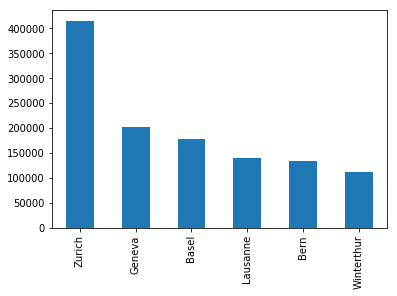

In [1]:
import pandas as pd

cities_and_population = [("Zurich", 415367),
                         ("Geneva", 201818),
                         ("Basel", 177654),
                         ("Lausanne", 139111),
                         ("Bern", 133883),
                         ("Winterthur", 111851)]

cities, populations = list(zip(*cities_and_population))
s = pd.Series(populations, index=cities)

s.plot(kind="bar")

### Converting two Iterables into a Dictionary

zip also offers us an excellent opportunity to convert two iterables into a dictionary. Of course, only if these iterables meet certain requirements. The iterable, which should be used as keys, must be unique and can only consist of immutables. We demonstrate this with the following morse code example. The full morse code alphabet can be found in our chapter on [dictionaries](python3_dictionaries.php):


In [11]:
abc = "abcdef"
morse_chars = [".-", "-...", "-.-.", "-..", ".", "..-."]
               
text2morse = dict(zip(abc, morse_chars))
print(text2morse)

{'a': '.-', 'b': '-...', 'c': '-.-.', 'd': '-..', 'e': '.', 'f': '..-.'}


### Footnotes

<sub> 1 </sub> The data are from the 1st of April 2020, no joke. The locations are chosen arbitrarily. Yet, there is a special reason, why I had chosen Hohenpeißenberg. On the Hohenpeißenberg I was invited to give two unforgettable Python courses for the German weather service: Great people and a fantastic view!